In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame({
    'Potência (kW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m2)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [3]:
# Separando as características e o rótulo
X = data[['Potência (kW)', 'Eficiência (%)', 'Idade (anos)', 'Tamanho (m2)']]

y = data['Consumo de Energia']

In [4]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Treinando um modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

In [7]:
# Fazendo previsões no conjunto de teste
y_pred = svm_model.predict(X_test)

In [8]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(classification_rep) #mostra um resumo
cm = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Text(0.5, 1.0, 'Matriz de confusão')

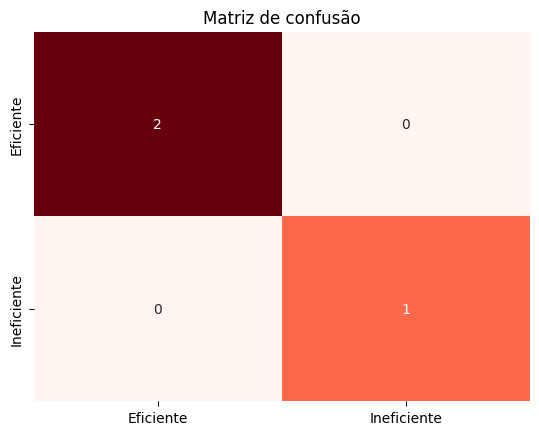

In [9]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels = ['Eficiente', 'Ineficiente'],
            yticklabels = ['Eficiente', 'Ineficiente'])

plt.title('Matriz de confusão')